第一题：每月订单数量的折线图  
第二题：不同省份成交金额的水平柱状图   
第三题：不同省份用户男女人数对比簇状柱形图  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('电子产品销售分析.csv')
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [5]:
#数据清洗和处理
#数据类型转化
df['event_time'] = pd.to_datetime(df['event_time'].str[:19], format="%Y-%m-%d %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     564169 non-null  int64         
 1   event_time     564169 non-null  datetime64[ns]
 2   order_id       564169 non-null  int64         
 3   product_id     564169 non-null  int64         
 4   category_id    564169 non-null  float64       
 5   category_code  434799 non-null  object        
 6   brand          536945 non-null  object        
 7   price          564169 non-null  float64       
 8   user_id        564169 non-null  float64       
 9   age            564169 non-null  float64       
 10  sex            564169 non-null  object        
 11  local          564169 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 51.7+ MB


In [6]:
#计算时间变量
df['Month'] = df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour

In [8]:
# 查看缺失值情况
np.sum(df.isnull())

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
Month                 0
Day                   0
hour                  0
dtype: int64

In [10]:
# 将有缺失项的两列用missing填充
df['category_code'].fillna('missing',inplace=True)
df['brand'].fillna('missing',inplace=True)
np.sum(df.isnull())

Unnamed: 0       0
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
Month            0
Day              0
hour             0
dtype: int64

In [11]:
#重复值检查和处理
df.duplicated()
df.drop_duplicates()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564164,2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,21.0,男,上海,11,21,10
564165,2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,21.0,女,北京,11,21,10
564166,2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,19.0,女,上海,11,21,10
564167,2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,missing,moulinex,41.64,1.515916e+18,19.0,女,上海,11,21,10


画出每月成交金额折线图

Text(0.5, 1.0, '每月下单人数图')

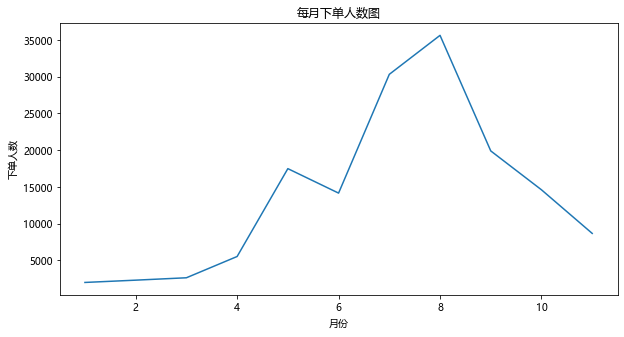

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df[df['price'] > 0].groupby('Month')['user_id'].nunique())
plt.xlabel('月份')
plt.ylabel('下单人数')
plt.title('每月下单人数图')

每月消费人数的折线图

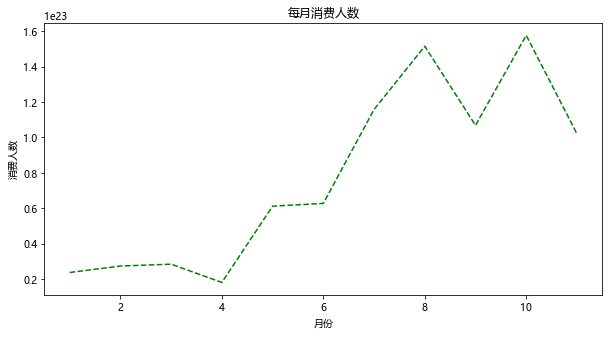

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df[df['price']>0].groupby('Month')['user_id'].sum(), linestyle='--', color='g')
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月消费人数')
plt.show()

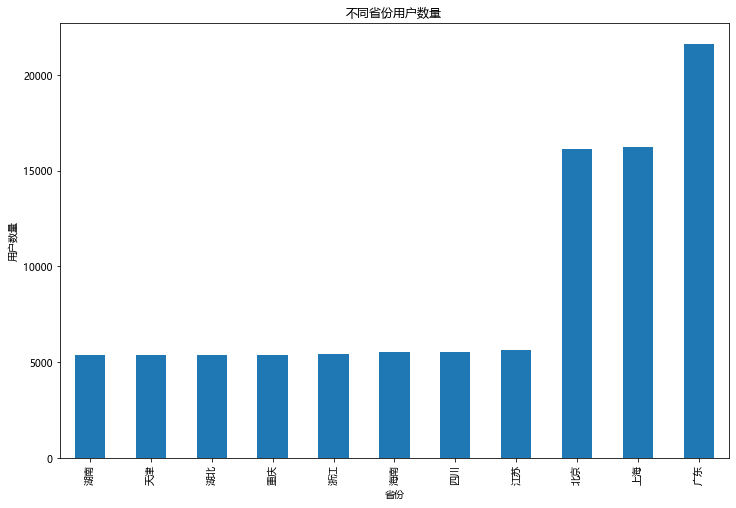

In [16]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['user_id'].nunique().sort_values(ascending=True).plot.bar()
plt.xlabel('省份')
plt.ylabel('用户数量')
plt.title('不同省份用户数量')
plt.show()

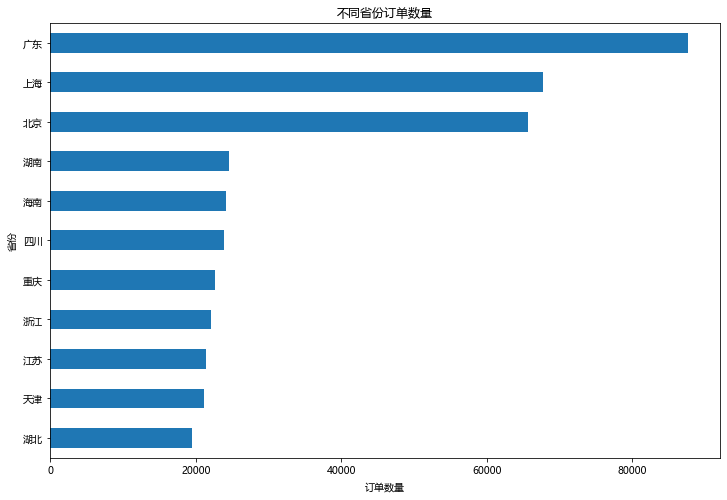

In [17]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['order_id'].nunique().sort_values(ascending=True).plot.barh()
plt.xlabel('订单数量')
plt.ylabel('省份')
plt.title('不同省份订单数量')
plt.show()

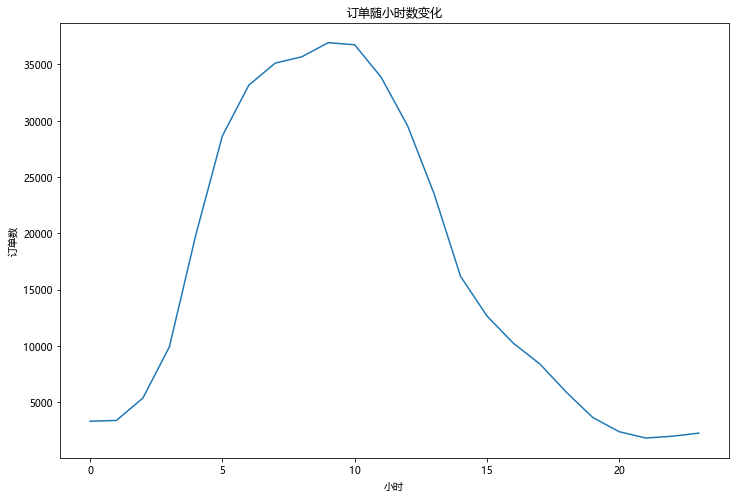

In [18]:
#下单时间分布
#小时
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('hour')['order_id'].nunique().plot()
plt.xlabel('小时')
plt.ylabel('订单数')
plt.title('订单随小时数变化')
plt.show()

In [19]:
df[df['price']==0].count() 

Unnamed: 0       39
event_time       39
order_id         39
product_id       39
category_id      39
category_code    39
brand            39
price            39
user_id          39
age              39
sex              39
local            39
Month            39
Day              39
hour             39
dtype: int64

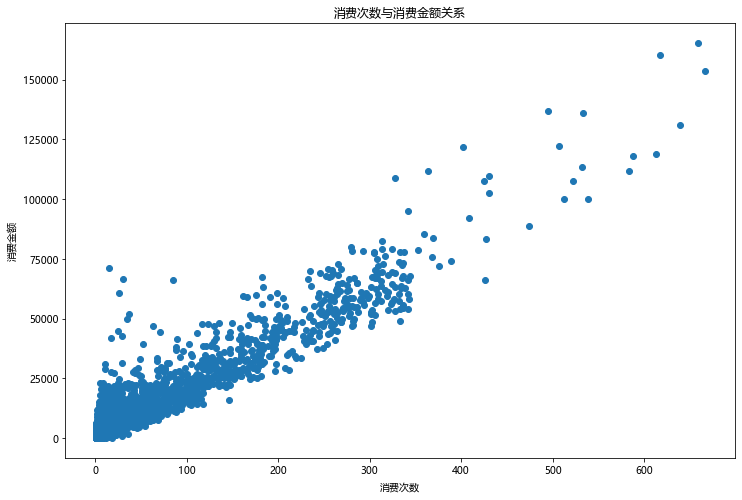

In [21]:
#消费次数与消费金额的关系
plt.figure(figsize=(12,8))
plt.scatter(x=df[df['price']>0].groupby('user_id')['order_id'].nunique(),
           y=df[df['price']>0].groupby('user_id')['price'].sum())
plt.xlabel('消费次数')
plt.ylabel('消费金额')
plt.title('消费次数与消费金额关系')
plt.show()

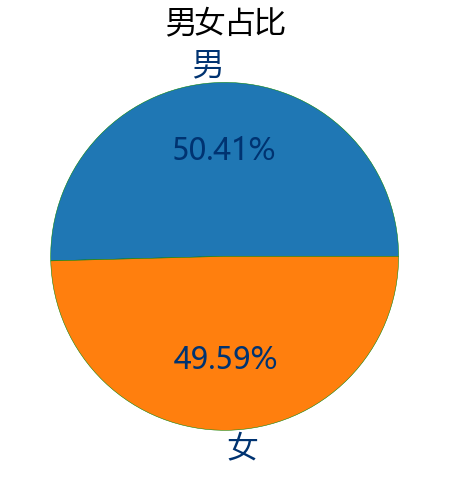

In [22]:
df_sex = df['sex'].value_counts() 
df = df[df['price']>0]
plt.figure(figsize=(8,8))
plt.pie(df_sex.values, labels=df_sex.index, autopct='%.2f%%',
       wedgeprops={'linewidth':0.5,'edgecolor':'green'},
       textprops={'fontsize':30,'color':'#003371'}
       ) 
plt.title('男女占比', size=30)
plt.show()

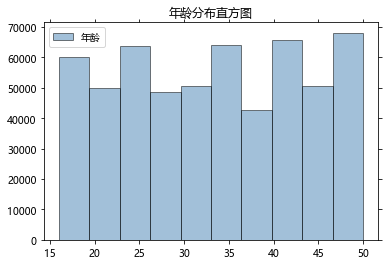

In [23]:
plt.hist(df['age'], bins=10, color='steelblue', edgecolor='k', label='年龄', alpha=0.5)
plt.title('年龄分布直方图')
plt.legend()
plt.tick_params(top='off', right='off')
plt.show()

In [24]:
bins = [10,20,30,40,50]
labels = ['10-20','20-30','30-40','40-50']
df['age_box'] = pd.cut(df['age'], bins, labels=labels)
age_box = df['age_box'].value_counts()[labels]
age_box

10-20     78257
20-30    159756
30-40    156550
40-50    169567
Name: age_box, dtype: int64

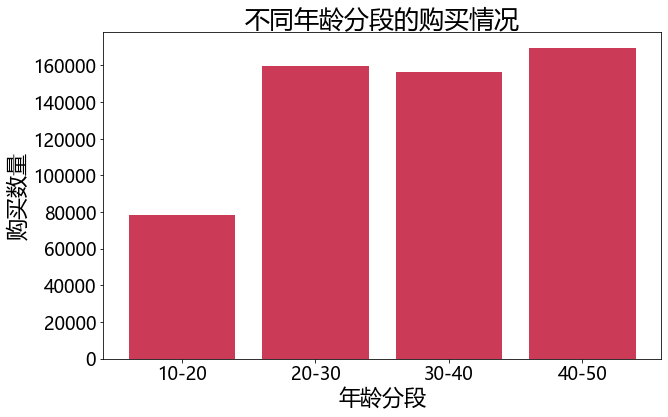

In [25]:
plt.figure(figsize=(10,6))
plt.bar(labels, age_box.values, color='#cb3a56')
plt.ylabel('购买数量', size=22)
plt.xlabel('年龄分段', size=22)
plt.xticks(size=18)
plt.yticks(size=18)

plt.title('不同年龄分段的购买情况', size=25)
plt.show()

In [27]:
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour,age_box
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11,20-30
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11,20-30
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14,30-40
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14,30-40
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,19,30-40


Text(0.5, 1.0, '每月订单数量图')

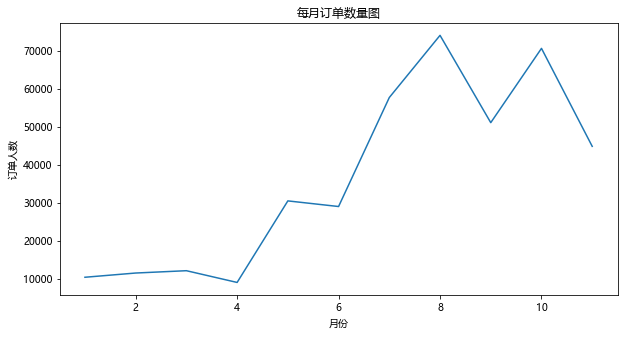

In [28]:
# 每月订单数量的折线图
plt.figure(figsize=(10,5))
plt.plot(df[df['price'] > 0].groupby('Month')['order_id'].nunique())
plt.xlabel('月份')
plt.ylabel('订单人数')
plt.title('每月订单数量图')
plt.show()

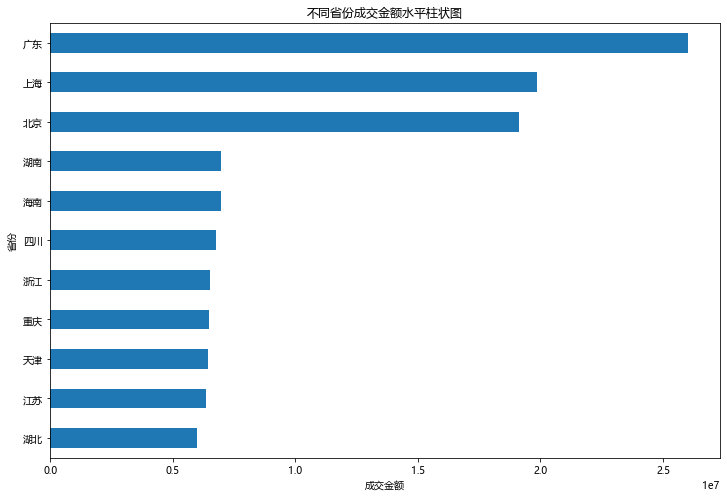

In [37]:
# 不同省份成交金额的水平柱状图
plt.figure(figsize=(12,8))
df[df['price'] > 0].groupby('local')['price'].sum().sort_values(ascending=True).plot.barh()
plt.xlabel('成交金额')
plt.ylabel('省份')
plt.title('不同省份成交金额水平柱状图')
plt.show()

In [42]:
df_sex

男    284421
女    279748
Name: sex, dtype: int64

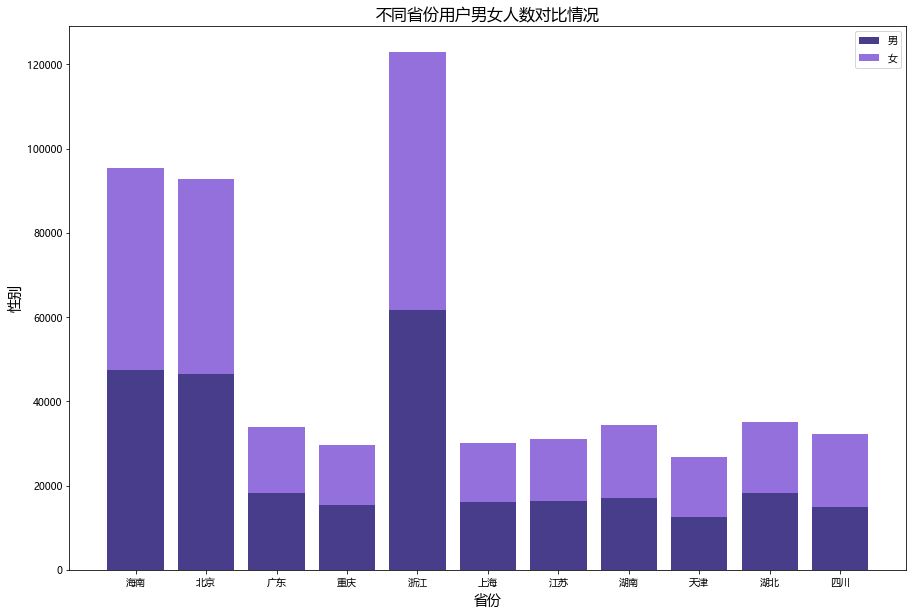

In [49]:
cities = df.drop_duplicates(['local'])['local']
df_city = [city for city in cities]

plt.figure(figsize=(15,10))
sex_m = df[df[df['price']>0]['sex'] == '男'].groupby('local')['sex'].count()
sex_f = df[df[df['price']>0]['sex'] == '女'].groupby('local')['sex'].count()
plt.bar(df_city,sex_m,color='darkslateblue',label='男')
plt.bar(df_city,sex_f,bottom=sex_m,color='mediumpurple',label='女')
plt.legend(loc='best')
plt.ylabel('性别', size=14)
plt.xlabel('省份', size=14)
plt.title('不同省份用户男女人数对比情况', size=16)
plt.show()

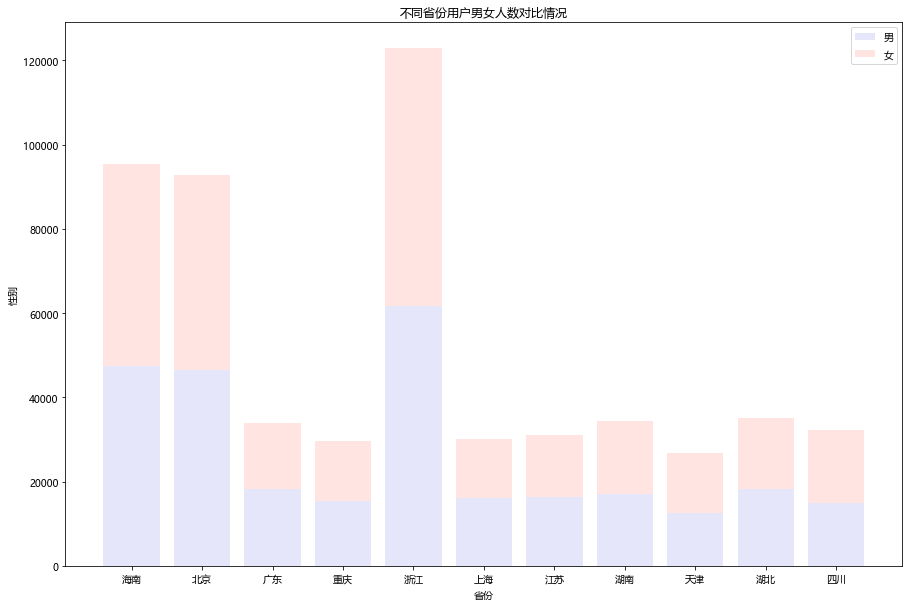

In [54]:
cities = df.drop_duplicates(['local'])['local']
df_city = [city for city in cities]

plt.figure(figsize=(15,10))
sex_m = df[df[df['price']>0]['sex'] == '男'].groupby('local')['sex'].count()
sex_f = df[df[df['price']>0]['sex'] == '女'].groupby('local')['sex'].count()
plt.bar(df_city,sex_m,color='lavender',label='男')
plt.bar(df_city,sex_f,bottom=sex_m,color='mistyrose',label='女')
plt.legend(loc='best')
plt.ylabel('性别')
plt.xlabel('省份')
plt.title('不同省份用户男女人数对比情况')
plt.show()